In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
num_epochs = 5
batch_size = 40
learning_rate = 0.001
classes = ('plane', 'car' , 'bird',
    'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')


cuda


In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Resize(size=(224, 224)),
    transforms.Normalize( 
       (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010) 
    )
])
train_dataset = torchvision.datasets.MNIST(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset = torchvision.datasets.MNIST(
    root= './data', train = False,
    download =True, transform = transform)


In [17]:
train_loader = torch.utils.data.DataLoader(train_dataset
    , batch_size = batch_size
    , shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset
    , batch_size = batch_size
    , shuffle = True)
n_total_step = len(train_loader)
print(n_total_step)


1500


In [18]:
model = models.vgg16(pretrained = True)
input_lastLayer = model.classifier[6].in_features
model.classifier[6] = nn.Linear(input_lastLayer,10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9,weight_decay=5e-4)


In [19]:
for epoch in range(num_epochs):
    for i, (imgs , labels) in enumerate(train_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        labels_hat = model(imgs)
        n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
        loss_value = criterion(labels_hat, labels)
        loss_value.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i+1) % 25 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}%')
            print()


epoch 1/5, step: 25/1500: loss = 0.86713, acc = 75.00%

epoch 1/5, step: 50/1500: loss = 0.28551, acc = 92.50%

epoch 1/5, step: 75/1500: loss = 0.09017, acc = 97.50%

epoch 1/5, step: 100/1500: loss = 0.03894, acc = 97.50%

epoch 1/5, step: 125/1500: loss = 0.06745, acc = 100.00%

epoch 1/5, step: 150/1500: loss = 0.04072, acc = 100.00%

epoch 1/5, step: 175/1500: loss = 0.18245, acc = 90.00%

epoch 1/5, step: 200/1500: loss = 0.13722, acc = 97.50%

epoch 1/5, step: 225/1500: loss = 0.01168, acc = 100.00%

epoch 1/5, step: 250/1500: loss = 0.04467, acc = 97.50%

epoch 1/5, step: 275/1500: loss = 0.05080, acc = 97.50%

epoch 1/5, step: 300/1500: loss = 0.05075, acc = 97.50%

epoch 1/5, step: 325/1500: loss = 0.02076, acc = 100.00%

epoch 1/5, step: 350/1500: loss = 0.01207, acc = 100.00%

epoch 1/5, step: 375/1500: loss = 0.09433, acc = 97.50%

epoch 1/5, step: 400/1500: loss = 0.00846, acc = 100.00%

epoch 1/5, step: 425/1500: loss = 0.00405, acc = 100.00%

epoch 1/5, step: 450/1500: 

epoch 3/5, step: 575/1500: loss = 0.00803, acc = 100.00%

epoch 3/5, step: 600/1500: loss = 0.01176, acc = 100.00%

epoch 3/5, step: 625/1500: loss = 0.00930, acc = 100.00%

epoch 3/5, step: 650/1500: loss = 0.00121, acc = 100.00%

epoch 3/5, step: 675/1500: loss = 0.01069, acc = 100.00%

epoch 3/5, step: 700/1500: loss = 0.00128, acc = 100.00%

epoch 3/5, step: 725/1500: loss = 0.00021, acc = 100.00%

epoch 3/5, step: 750/1500: loss = 0.00093, acc = 100.00%

epoch 3/5, step: 775/1500: loss = 0.00619, acc = 100.00%

epoch 3/5, step: 800/1500: loss = 0.01004, acc = 100.00%

epoch 3/5, step: 825/1500: loss = 0.01671, acc = 100.00%

epoch 3/5, step: 850/1500: loss = 0.00005, acc = 100.00%

epoch 3/5, step: 875/1500: loss = 0.00005, acc = 100.00%

epoch 3/5, step: 900/1500: loss = 0.00086, acc = 100.00%

epoch 3/5, step: 925/1500: loss = 0.01242, acc = 100.00%

epoch 3/5, step: 950/1500: loss = 0.00138, acc = 100.00%

epoch 3/5, step: 975/1500: loss = 0.00055, acc = 100.00%

epoch 3/5, ste

epoch 5/5, step: 1100/1500: loss = 0.00224, acc = 100.00%

epoch 5/5, step: 1125/1500: loss = 0.00098, acc = 100.00%

epoch 5/5, step: 1150/1500: loss = 0.00120, acc = 100.00%

epoch 5/5, step: 1175/1500: loss = 0.00048, acc = 100.00%

epoch 5/5, step: 1200/1500: loss = 0.00062, acc = 100.00%

epoch 5/5, step: 1225/1500: loss = 0.00192, acc = 100.00%

epoch 5/5, step: 1250/1500: loss = 0.00042, acc = 100.00%

epoch 5/5, step: 1275/1500: loss = 0.00090, acc = 100.00%

epoch 5/5, step: 1300/1500: loss = 0.00313, acc = 100.00%

epoch 5/5, step: 1325/1500: loss = 0.00408, acc = 100.00%

epoch 5/5, step: 1350/1500: loss = 0.00032, acc = 100.00%

epoch 5/5, step: 1375/1500: loss = 0.00012, acc = 100.00%

epoch 5/5, step: 1400/1500: loss = 0.00001, acc = 100.00%

epoch 5/5, step: 1425/1500: loss = 0.08242, acc = 97.50%

epoch 5/5, step: 1450/1500: loss = 0.00057, acc = 100.00%

epoch 5/5, step: 1475/1500: loss = 0.02657, acc = 100.00%

epoch 5/5, step: 1500/1500: loss = 0.02064, acc = 97.50%


In [21]:
with torch.no_grad():
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set , test_labels_set) in enumerate(test_loader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)
    
        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(axis = 1)
        number_corrects += (labels_predicted==test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

Overall accuracy 99.46000000000001%


In [435]:
for i, (imgs , labels) in enumerate(test_loader):
    imgs = imgs.to(device)
    labels = labels.to(device)
    imgs.requires_grad = True
    imgs.retain_grad = True
    labels_hat = model(imgs)
    n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
    loss_value = criterion(labels_hat, labels)
    loss_value.backward()
    break
    optimizer.step()
    optimizer.zero_grad()
    if (i+1) % 25 == 0:
        print(f'epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}%')
        print()


In [452]:
img_grad

tensor([[-4.7168e-12, -7.7876e-12, -3.5616e-13,  ..., -1.9885e-12,
         -2.1713e-12, -1.8087e-12],
        [-6.5133e-12, -1.2757e-12,  1.5180e-12,  ..., -4.9415e-13,
          4.3750e-13, -1.7771e-12],
        [-5.6287e-12,  7.7910e-14,  5.4362e-12,  ...,  7.1869e-13,
          1.1149e-12,  1.0027e-13],
        ...,
        [-1.7752e-12, -3.7109e-12, -4.3900e-14,  ..., -1.5015e-12,
         -1.8526e-12, -1.3368e-13],
        [-9.8968e-13, -2.1532e-12,  7.7469e-13,  ..., -1.3911e-12,
         -2.3986e-12, -2.2466e-12],
        [-3.6220e-12,  2.9167e-13,  3.8712e-13,  ..., -1.0909e-12,
         -5.6693e-13,  8.1267e-14]], device='cuda:0')

In [518]:
!mkdir MnistLRP

tensor(9, device='cuda:0')

 50%|█████     | 20/40 [00:35<00:35,  1.77s/it]<ipython-input-546-4cfdecc29916>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(60,27))
100%|██████████| 40/40 [01:11<00:00,  1.79s/it]


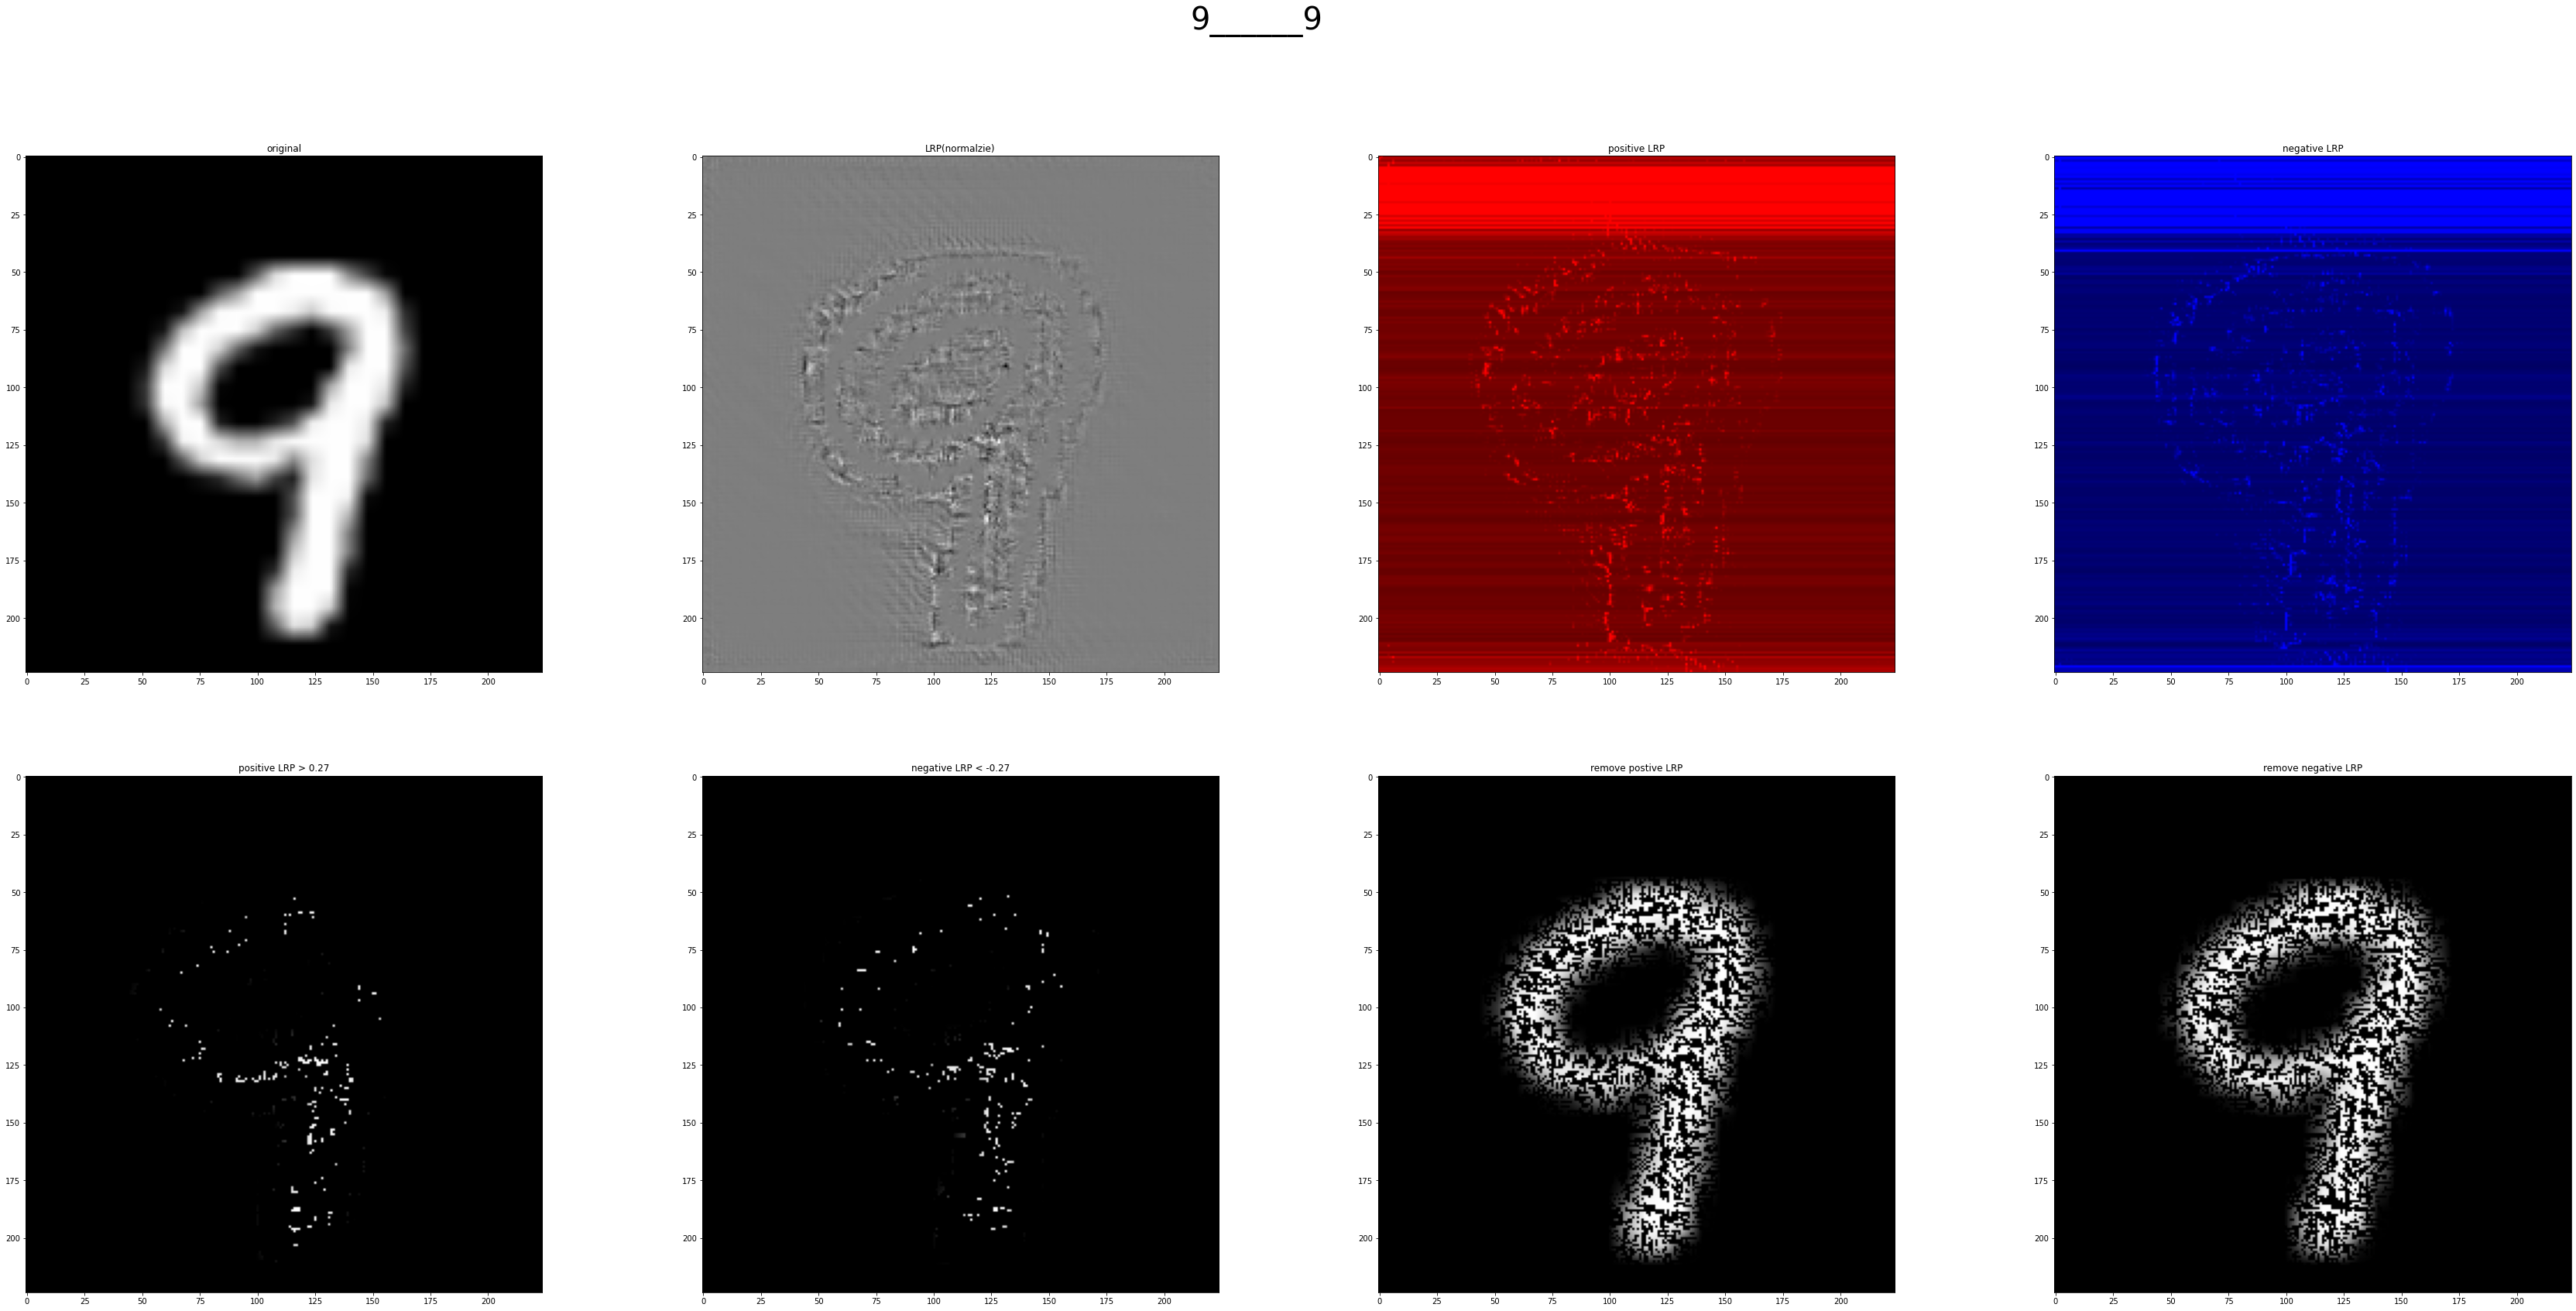

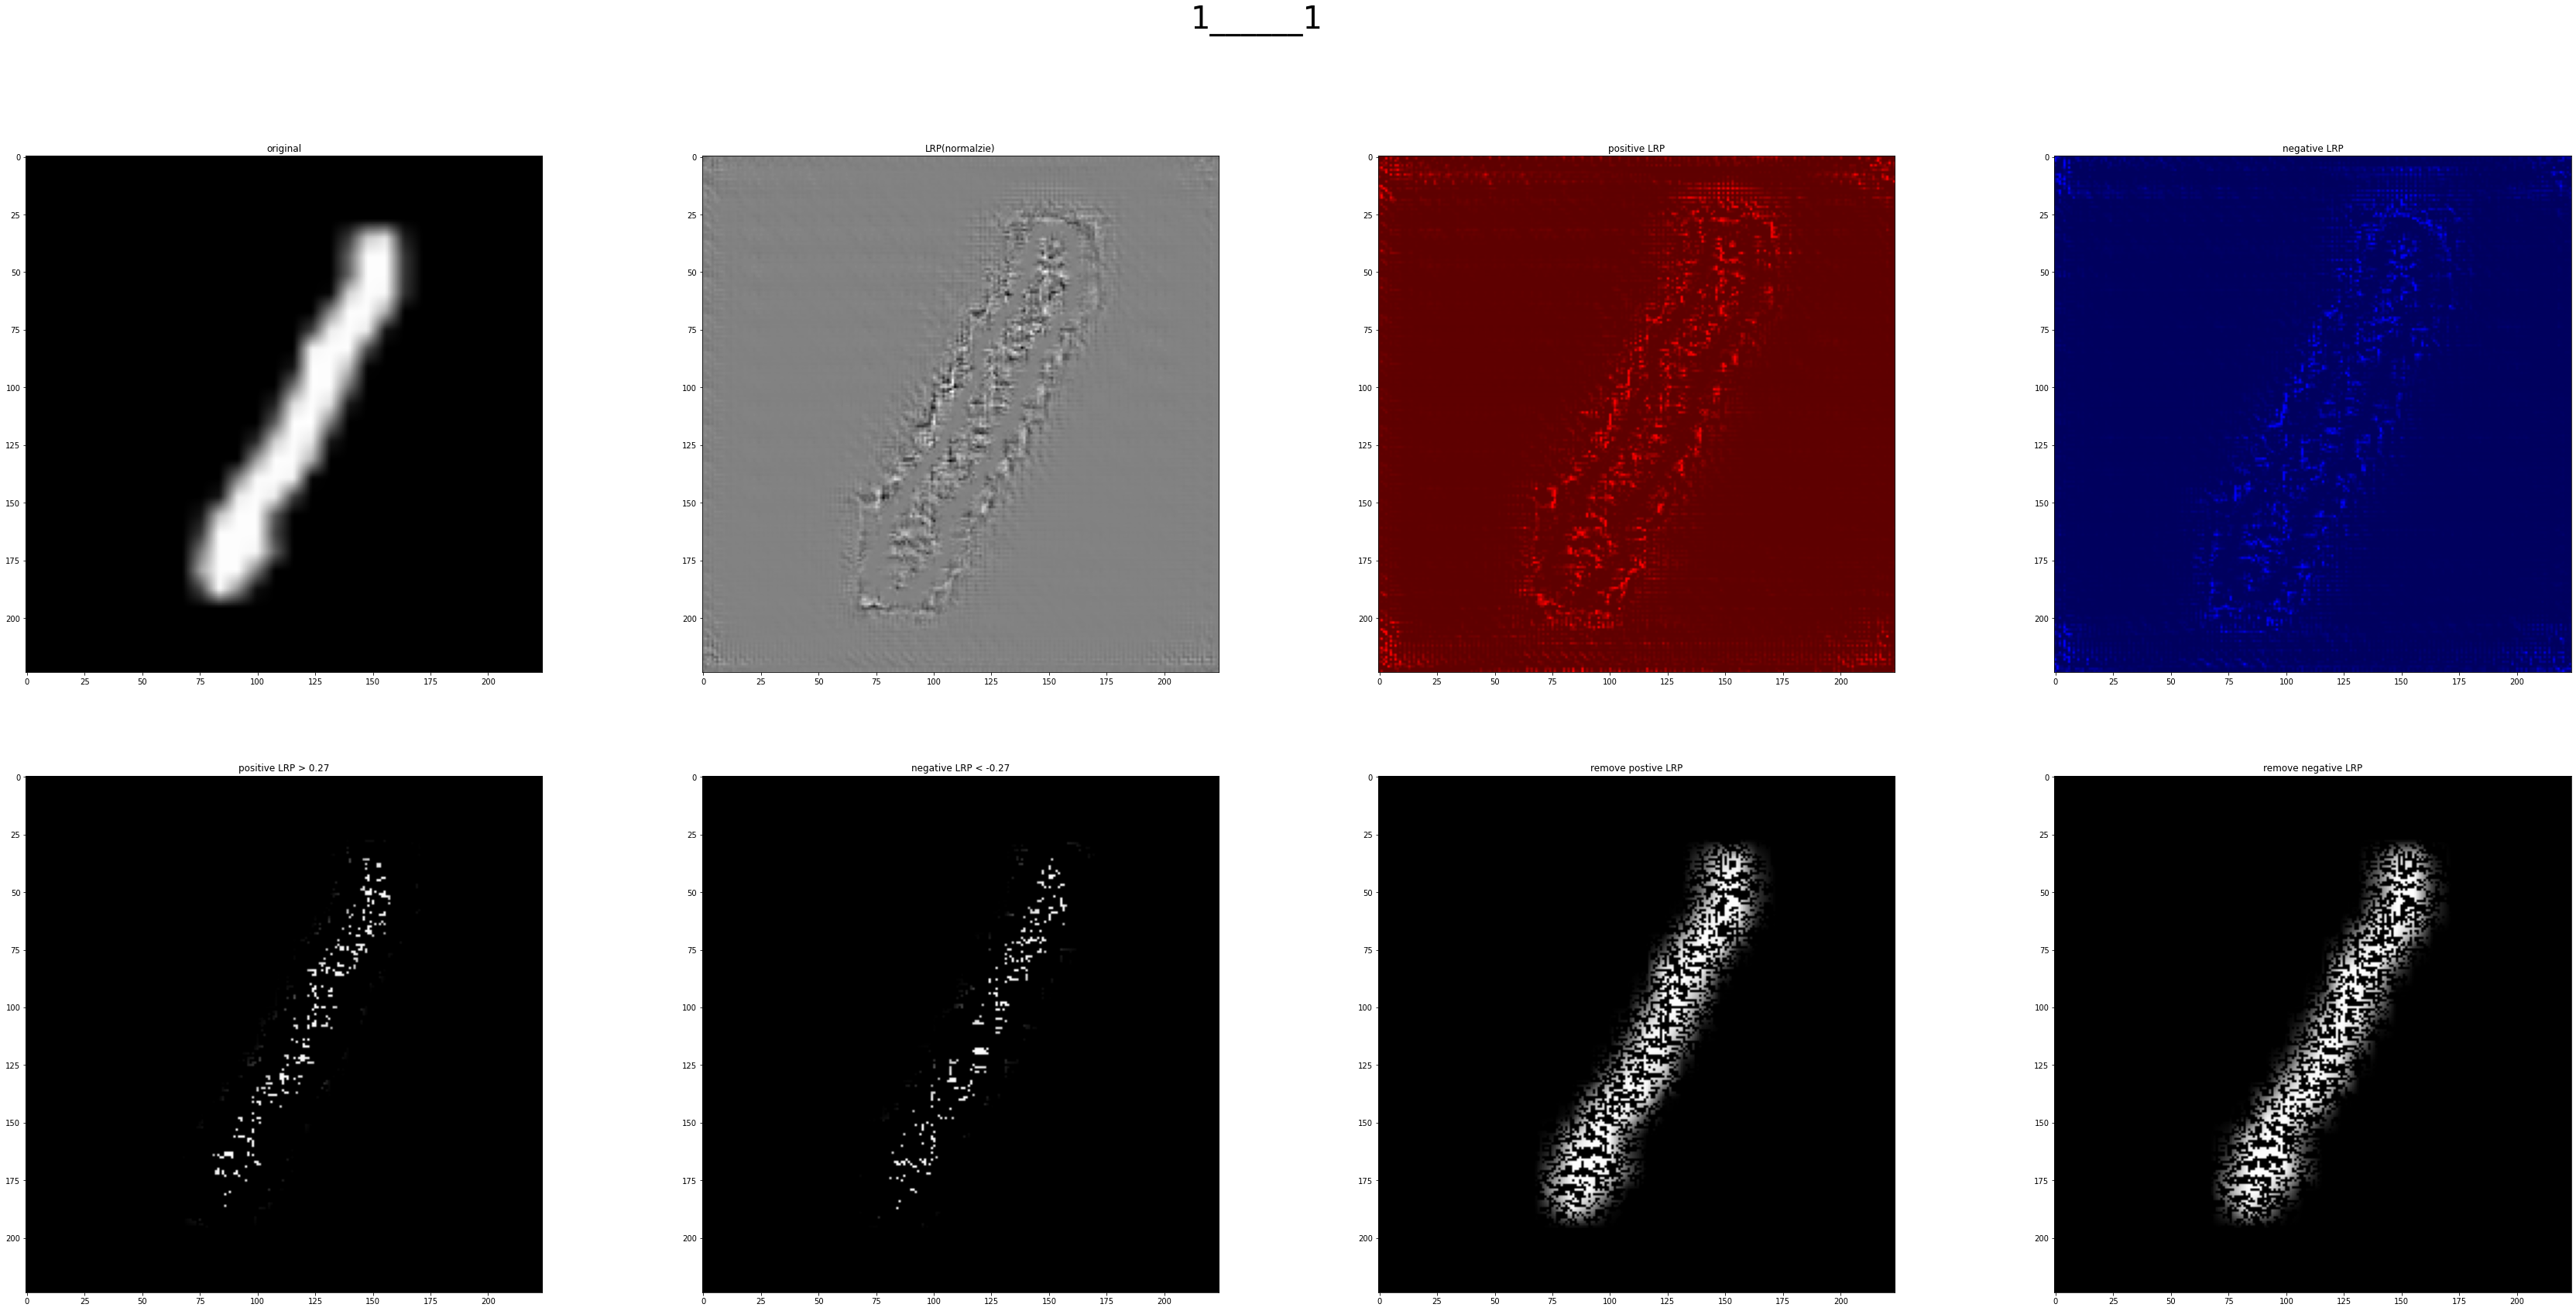

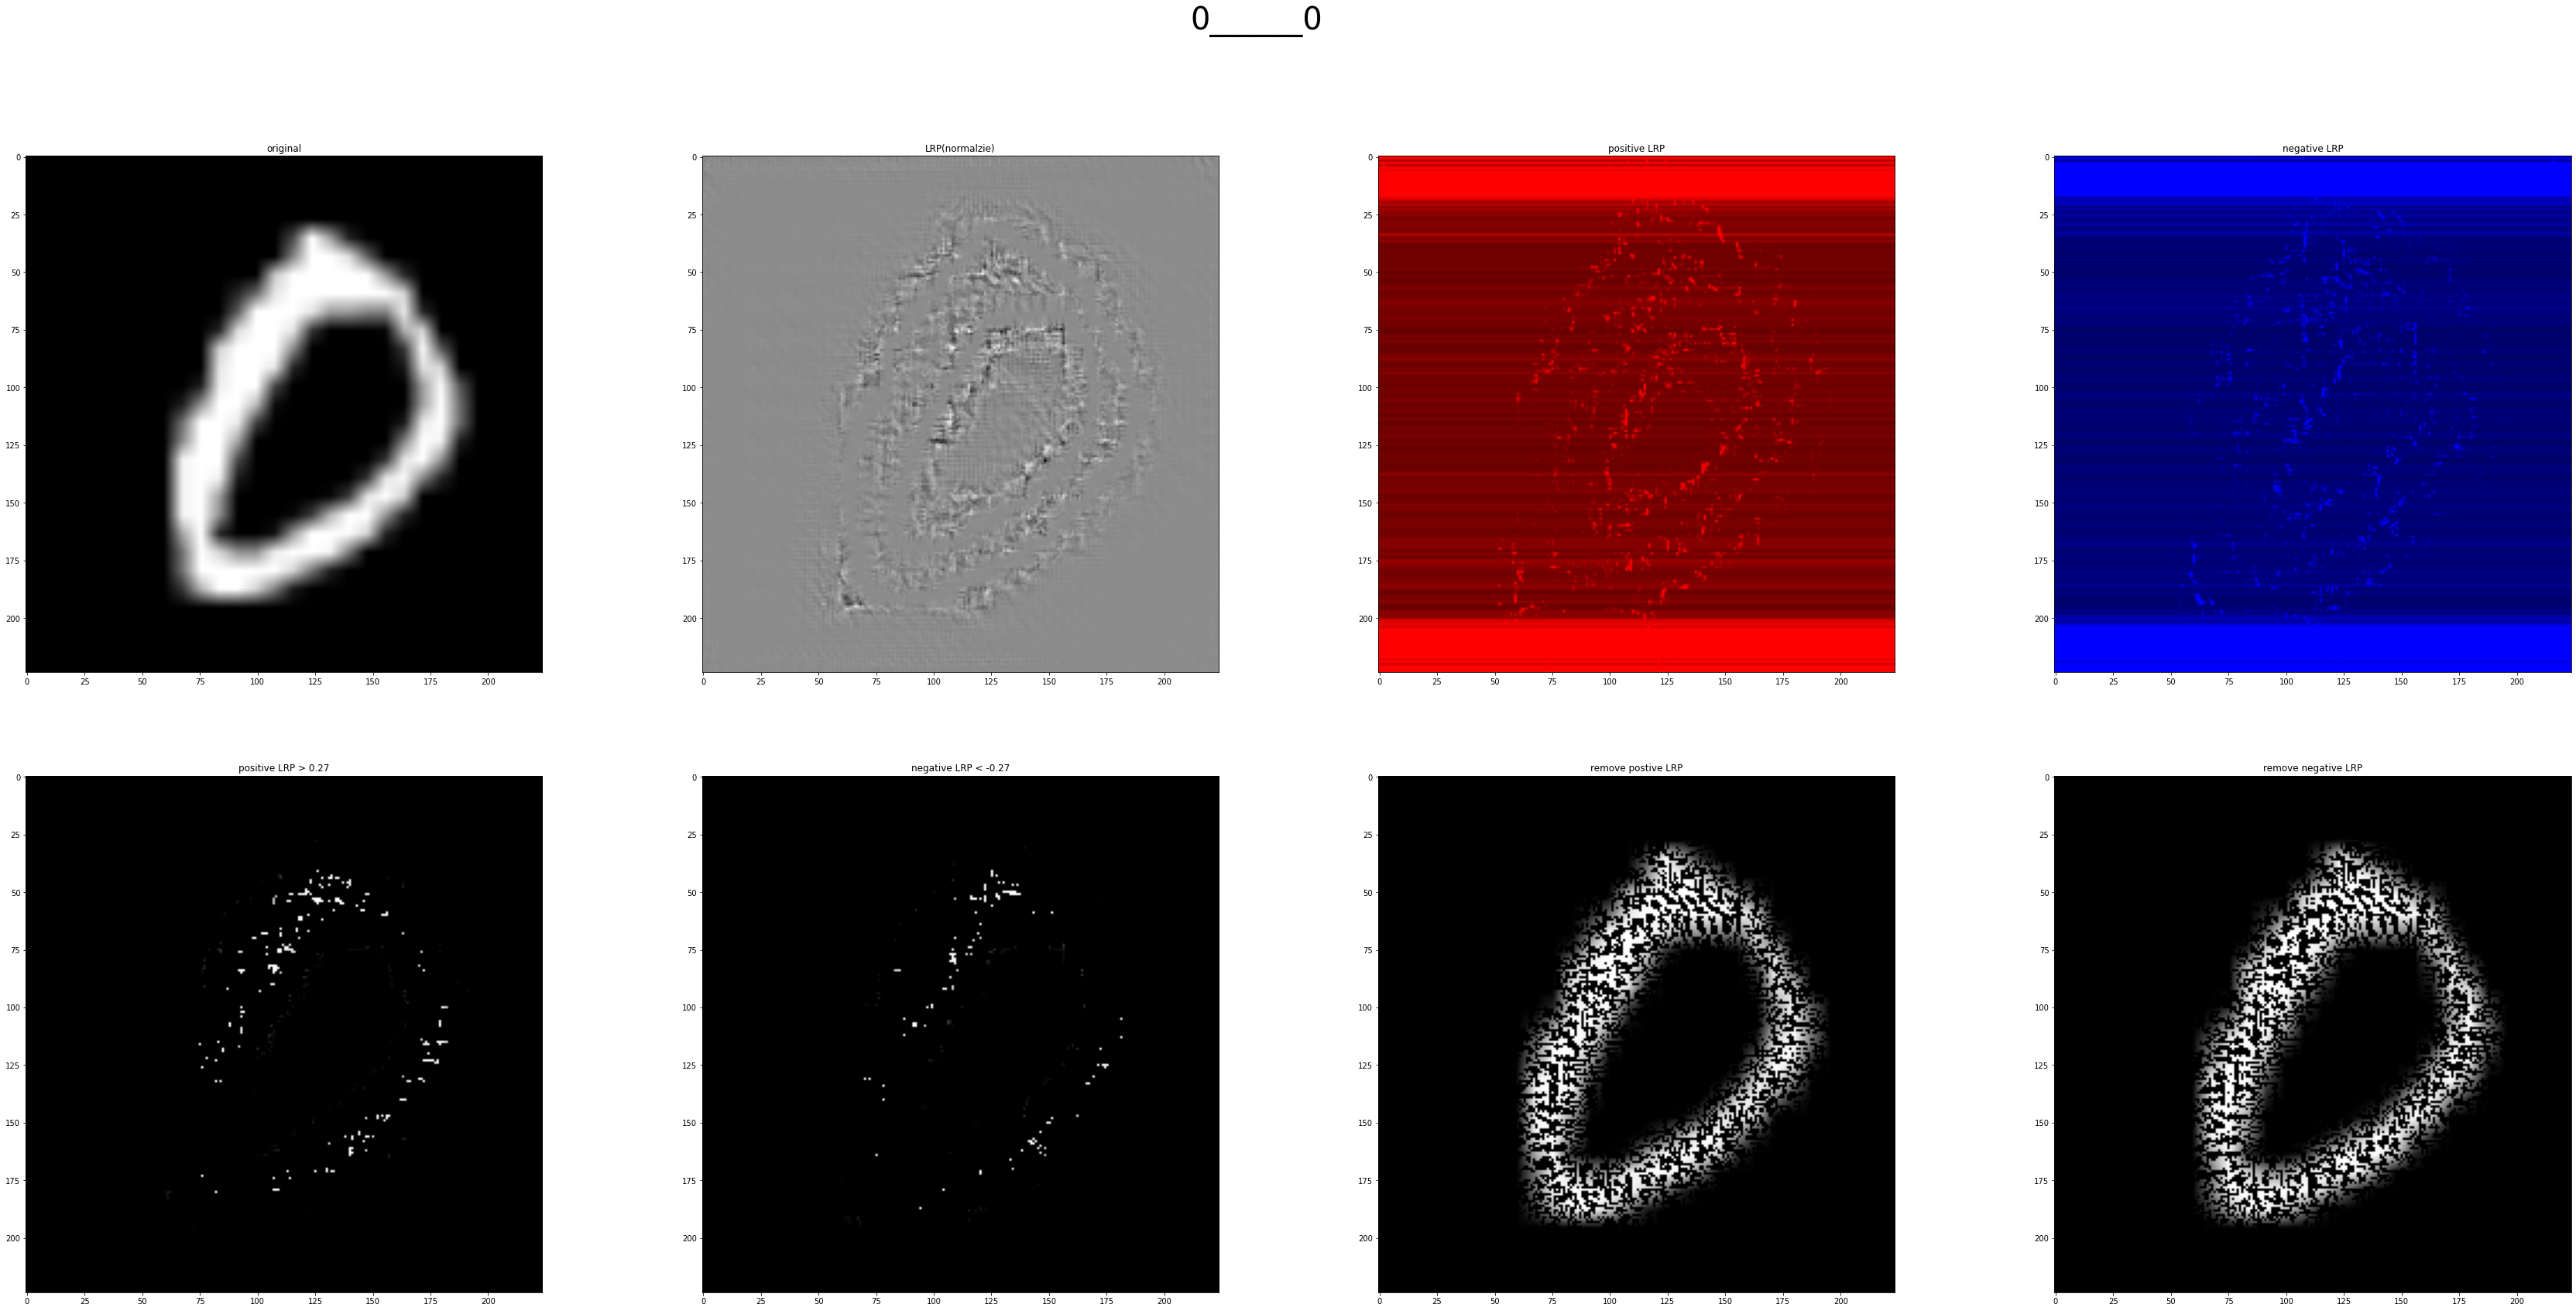

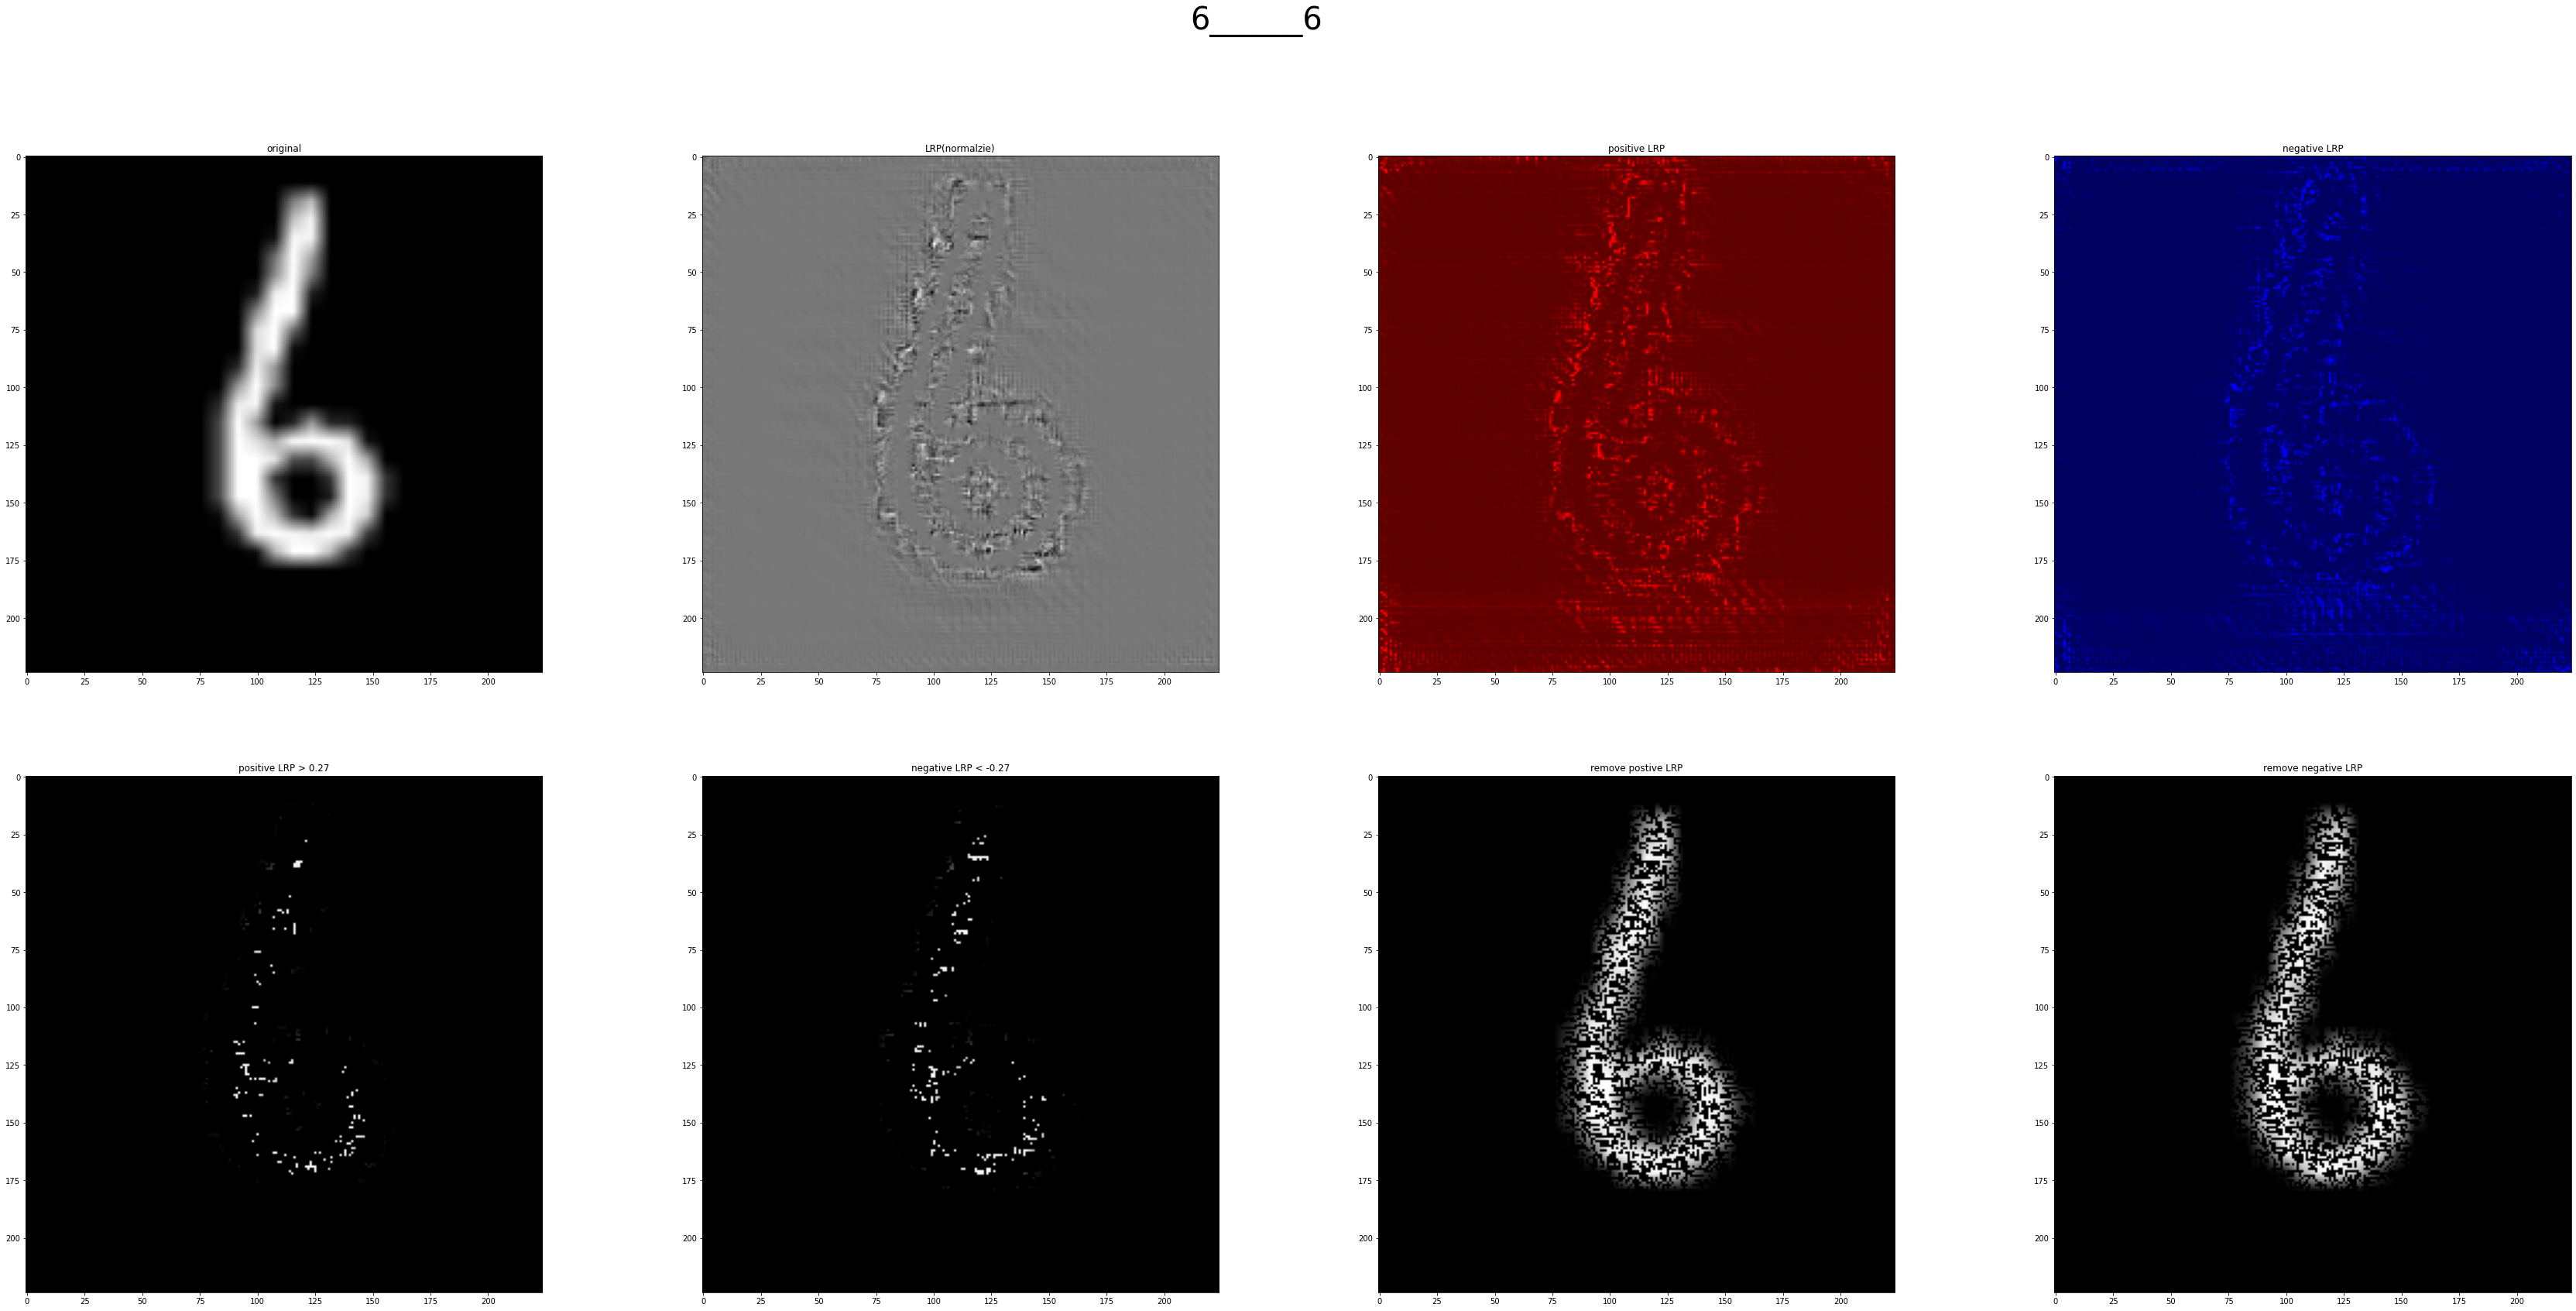

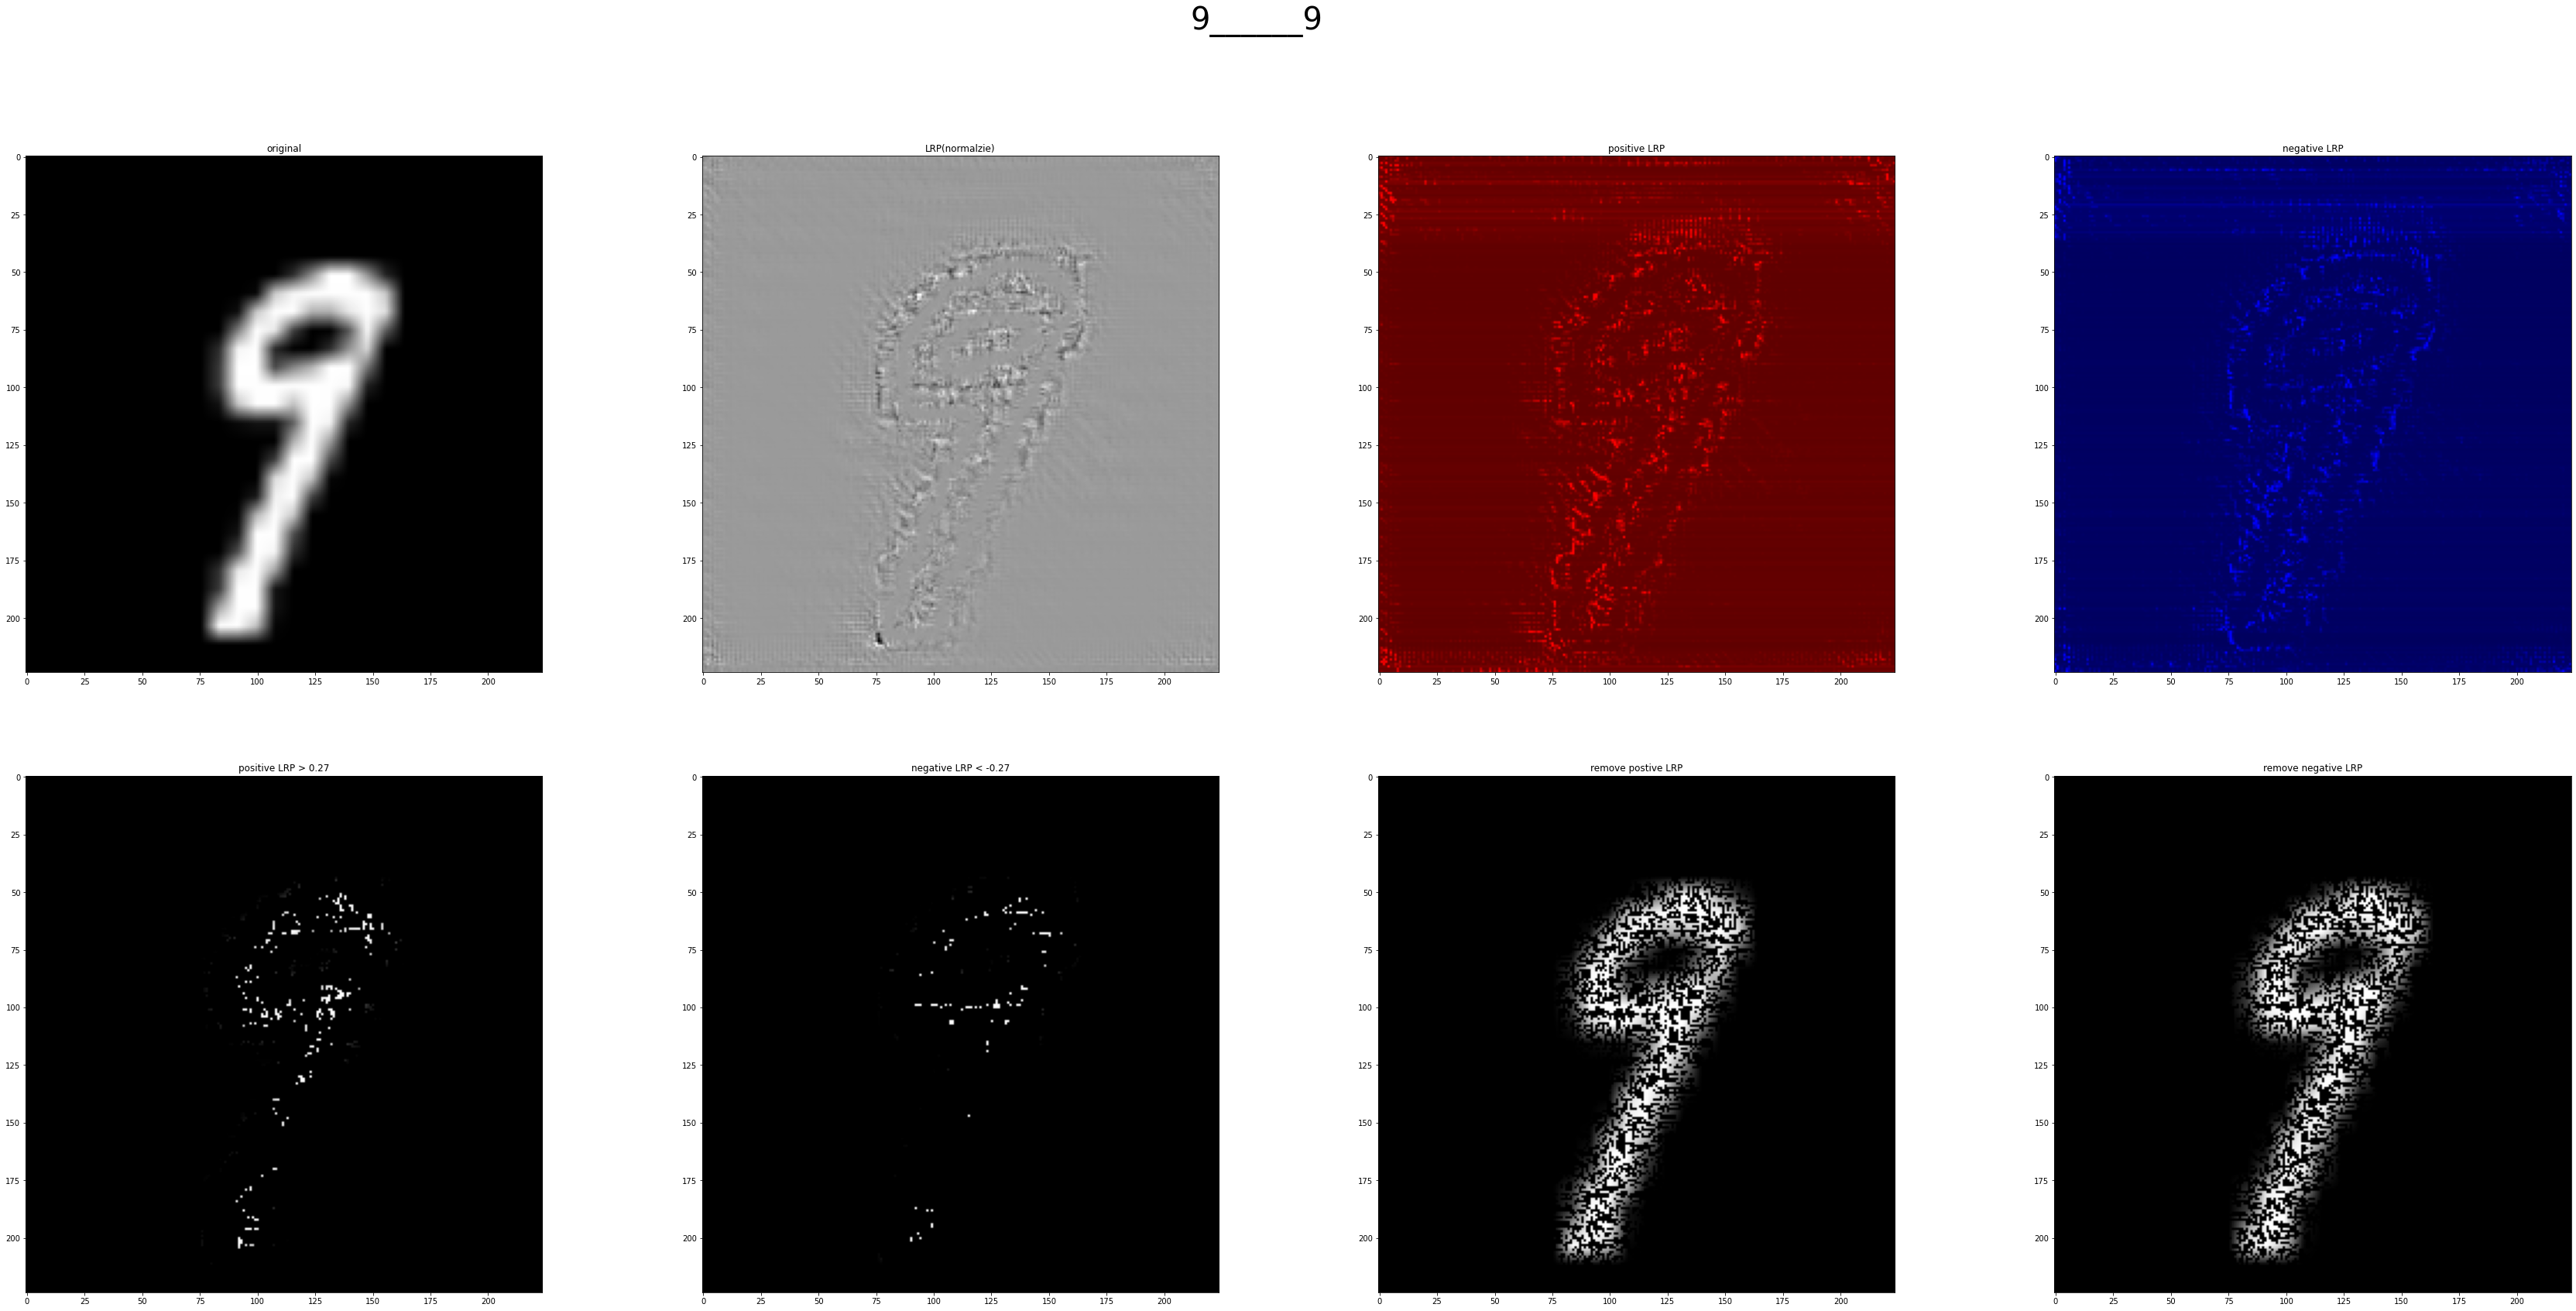

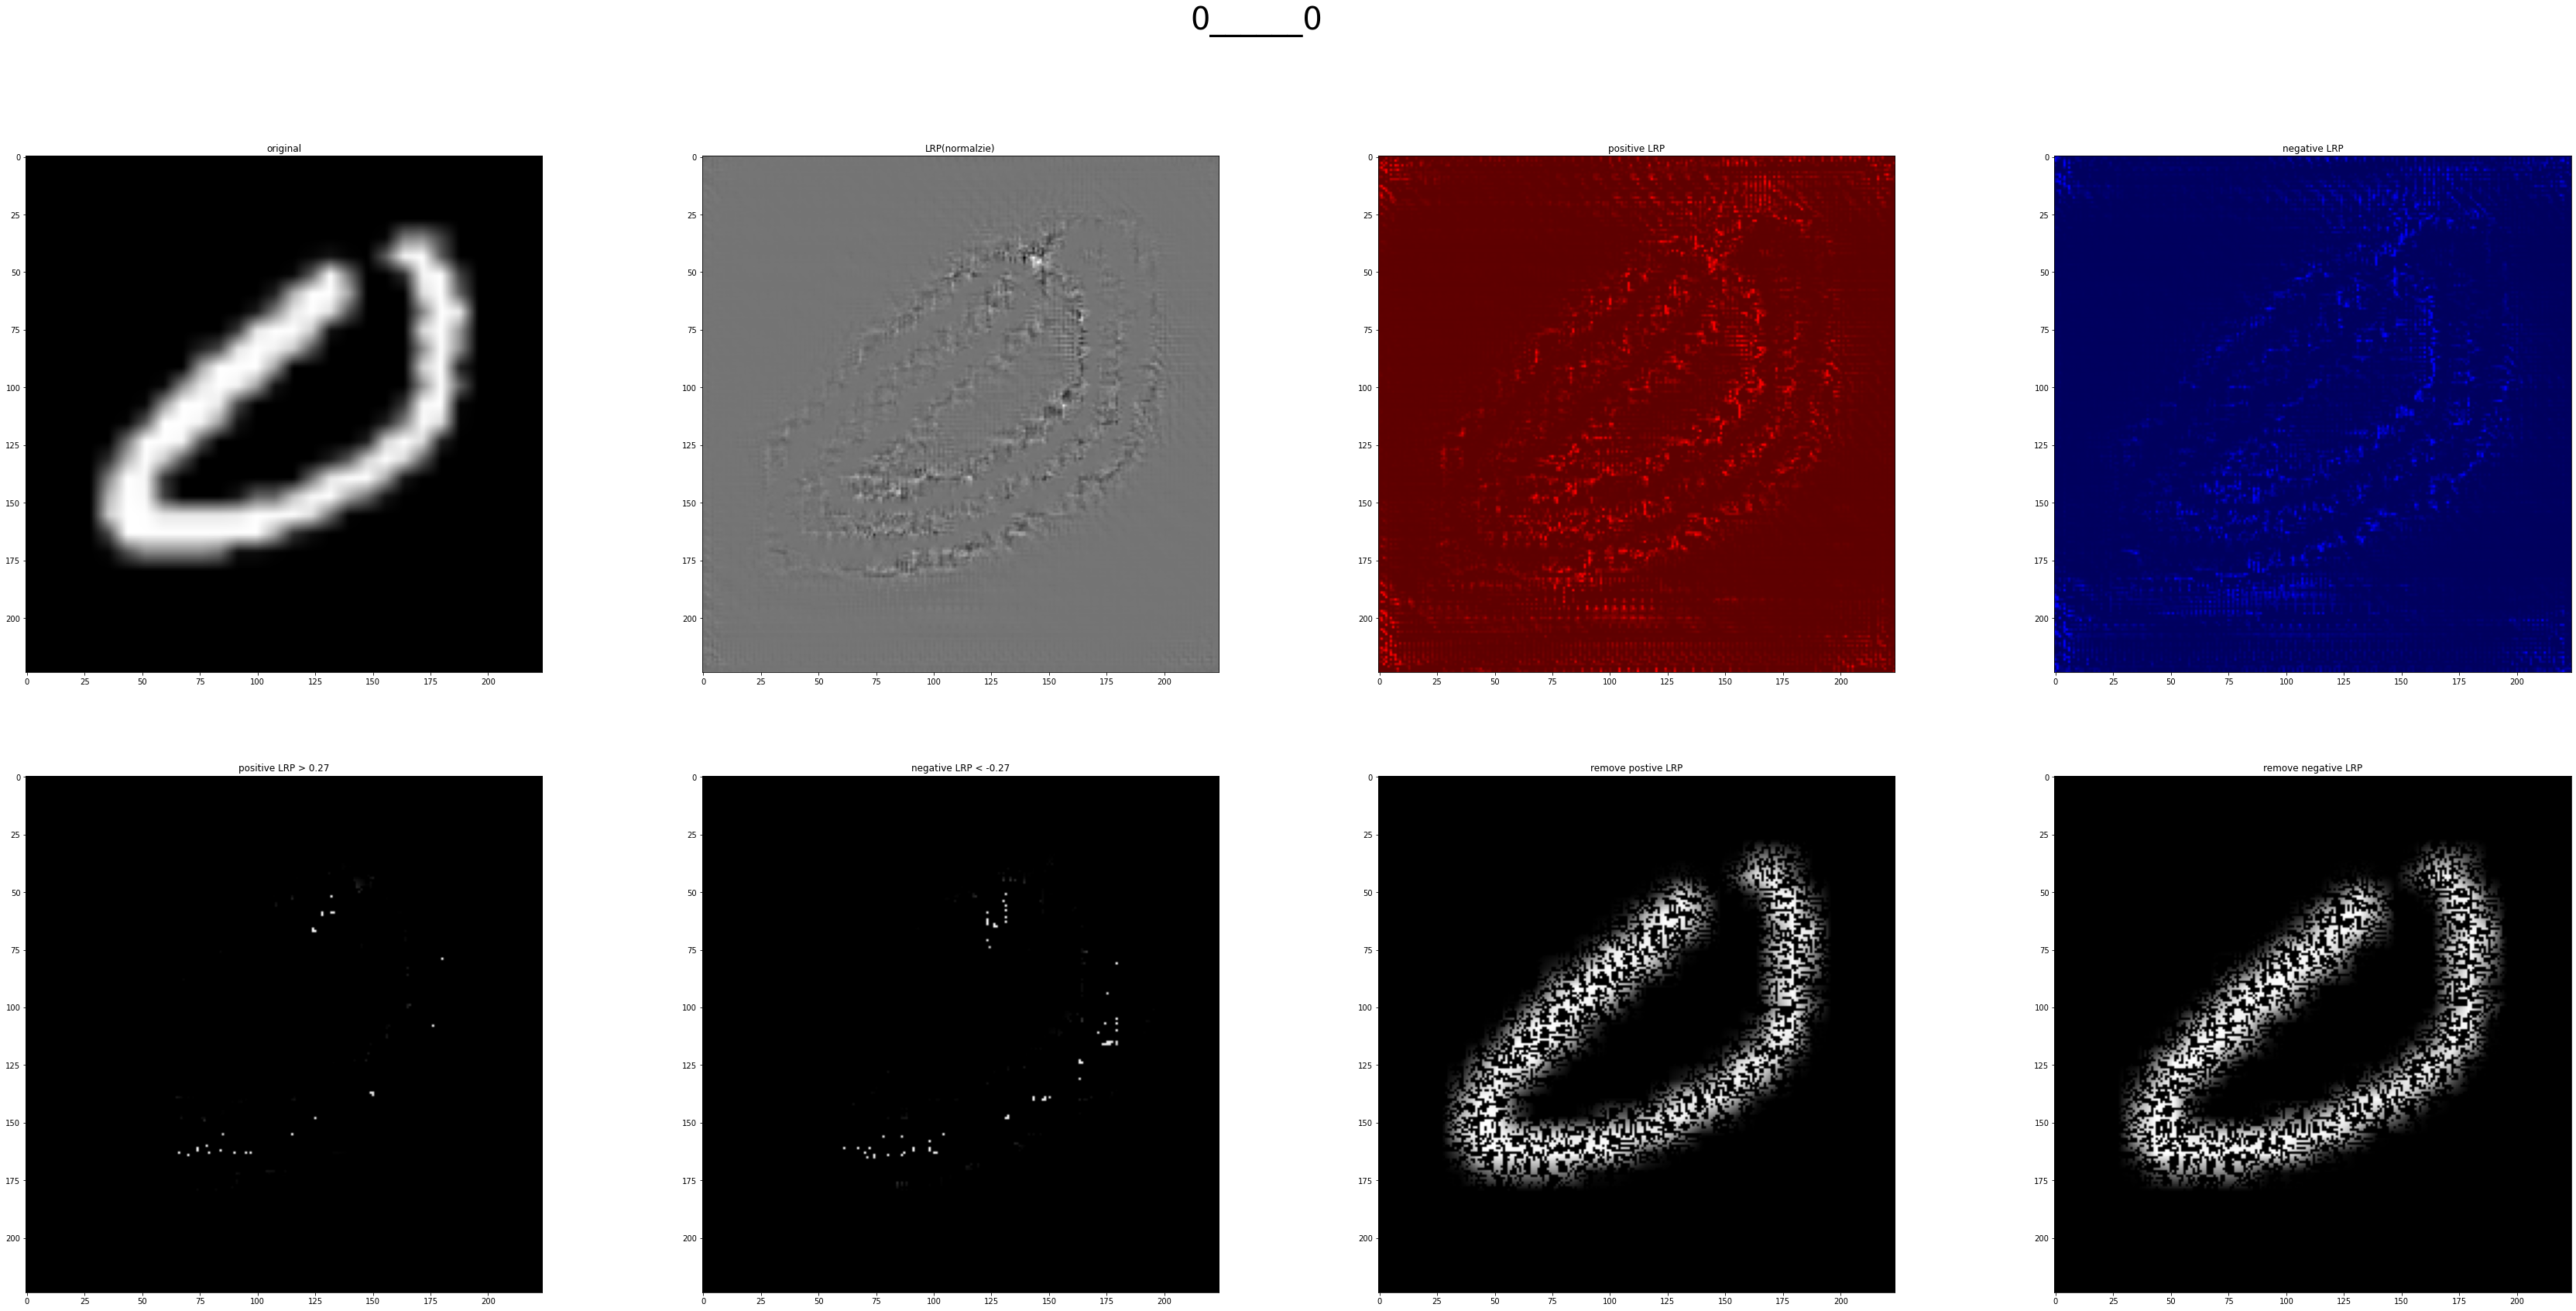

In [ ]:
import numpy as np
from PIL import Image
from tqdm import tqdm

normalize = lambda w: (w-torch.min(w)) / (torch.max(w-torch.min(w)))
normalize2 = lambda w, thr=0: w>thr

m = 1
thr = 0.00000000001

preds = labels_hat.argmax(axis=1)

for idx in tqdm(range(len(imgs))):
    img_grad = torch.sum((imgs * imgs.grad)[idx], axis = 0)

    plt.figure(figsize=(60,27))
    plt.suptitle(f"{int(labels[idx])}______{int(preds[idx])}", fontsize=40)
    plt.subplot(241)
    plt.title('original')
    original_image = normalize(imgs[idx]).cpu().detach().numpy()[0]
    plt.imshow(original_image, cmap='gray')
#     plt.show()
    

    plt.subplot(242)
    plt.title('LRP(normalzie)')
    np_array = normalize(img_grad).cpu().detach().numpy()
    plt.imshow(np_array, cmap='gray')
    


    plt.subplot(243)
    plt.title('positive LRP')
    r = f2(normalize_p(img_grad, thr), m).cpu().detach().numpy()
    g = torch.zeros_like(img_grad).unsqueeze(2).cpu().detach().numpy() 
    b = torch.zeros_like(img_grad).unsqueeze(2).cpu().detach().numpy() 
    img = np.concatenate((r,g,b), axis=2)
    plt.imshow(img)



    plt.subplot(244)
    plt.title('negative LRP')
    r = torch.zeros_like(img_grad).unsqueeze(2).cpu().detach().numpy()
    g = torch.zeros_like(img_grad).unsqueeze(2).cpu().detach().numpy()
    b = f2(normalize_n(img_grad, thr), m).cpu().detach().numpy()
    img = np.concatenate((r,g,b), axis=2)
    plt.imshow(img)

#     plt.subplot(245)
#     plt.title('negative LRP & positive LRP')
#     r = f2(normalize_p(img_grad, thr), m).cpu().detach().numpy()
#     g = torch.zeros_like(img_grad).unsqueeze(2).cpu().detach().numpy()
#     b = f2(normalize_n(img_grad, thr), m).cpu().detach().numpy()
#     img = np.concatenate((r,g,b), axis=2)
#     plt.imshow(img)
    
    plt.subplot(245)
    plt.title('positive LRP > 0.27')
    r = normalize_p(img_grad).unsqueeze(2).cpu().detach().numpy()
    np_array = original_image * (r.squeeze()>0.25)
    plt.imshow(np_array, cmap='gray')
    
    
    plt.subplot(246)
    plt.title('negative LRP < -0.27')
    b = normalize_n(img_grad).unsqueeze(2).cpu().detach().numpy()
    np_array = original_image * (b.squeeze()>0.25)
    plt.imshow(np_array, cmap='gray')
    

    
    plt.subplot(247)
    plt.title('remove postive LRP')
    r = normalize_p(img_grad).unsqueeze(2).cpu().detach().numpy()
    np_array = normalize(imgs[idx]).cpu().detach().numpy()[0] * (r.squeeze()==0.0)
    plt.imshow(np_array, cmap='gray')
    
    plt.subplot(248)
    plt.title('remove negative LRP')
    b = normalize_n(img_grad).unsqueeze(2).cpu().detach().numpy()
    np_array = normalize(imgs[idx]).cpu().detach().numpy()[0] * (b.squeeze()==0.0)
    plt.imshow(np_array, cmap='gray')
    
    plt.savefig(f"MnistLRP/{idx}.png")
    plt.close()
#     plt.show()
#     break

In [ ]:
!zip -r MnistLRP.zip MnistLRP

In [ ]:
r = normalize_p(img_grad).unsqueeze(2).cpu().detach().numpy()

In [491]:
normalize = lambda w: (w-torch.min(w)) / (torch.max(w-torch.min(w)))
normalize = lambda w: (w-torch.min(w)) / (torch.max(w-torch.min(w)))
normalize2 = lambda w, thr=0: w>thr

softmax = torch.nn.Softmax(dim=0)
Relu = nn.ReLU()

def normalize_max1(w):
    for i in range(len(w)):
        w[i] = w[i] / torch.max(abs(w[i]))
    return w


f2 = lambda w, m=1: normalize_max1(softmax(normalize_max1(w).flatten() * m).reshape(w.shape) * len(w[0])).unsqueeze(2)


def normalize_p(w, thr = 0): # 음수 버림, 0~1로 normalize
    w = w.clamp(min=thr)
    max_n = torch.max(abs(w))
    return (w / max_n)
    
def normalize_n(w, thr = 0): # 양수 버림, 0~1로 normalize
    w = w.clamp(max=-thr)
    max_n = torch.max(abs(w))
    return abs((w / max_n))
    



In [516]:
r

array([[[0.00750511],
        [0.01901744],
        [0.01085555],
        ...,
        [0.02031643],
        [0.01721618],
        [0.00417436]],

       [[0.00900802],
        [0.0006584 ],
        [0.0031828 ],
        ...,
        [0.01157696],
        [0.00895402],
        [0.        ]],

       [[0.00856685],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.00302654],
        [0.        ]],

       ...,

       [[0.01927094],
        [0.01029331],
        [0.        ],
        ...,
        [0.00627964],
        [0.01089343],
        [0.00821504]],

       [[0.01351664],
        [0.0058526 ],
        [0.        ],
        ...,
        [0.0084856 ],
        [0.02501724],
        [0.02325074]],

       [[0.01978177],
        [0.01602194],
        [0.        ],
        ...,
        [0.01603631],
        [0.01285718],
        [0.00289068]]], dtype=float32)

In [497]:
img_grad

tensor([[ 1.1231e-11,  1.8423e-11,  8.2399e-13,  ...,  4.7238e-12,
          5.1559e-12,  4.3293e-12],
        [ 1.5396e-11,  2.7565e-12, -3.9337e-12,  ...,  1.1046e-12,
         -1.1258e-12,  4.1962e-12],
        [ 1.3271e-11, -5.6723e-13, -1.3394e-11,  ..., -1.7674e-12,
         -2.7748e-12, -3.0375e-13],
        ...,
        [ 4.2467e-12,  8.7405e-12, -8.2684e-14,  ...,  3.5760e-12,
          4.4156e-12,  3.3777e-13],
        [ 2.3850e-12,  5.1126e-12, -1.8313e-12,  ...,  3.3436e-12,
          5.7545e-12,  5.3669e-12],
        [ 8.6451e-12, -6.2281e-13, -8.4706e-13,  ...,  2.6328e-12,
          1.3706e-12, -1.6226e-13]], device='cuda:0', grad_fn=<SumBackward1>)

In [463]:
normalize_p(img_grad)

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         ...,
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0216],
         ...,
         [0.0000],
         [0.0062],
         [0.0000]],

        [[0.0000],
         [0.0011],
         [0.0775],
         ...,
         [0.0102],
         [0.0159],
         [0.0014]],

        ...,

        [[0.0000],
         [0.0000],
         [0.0000],
         ...,
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0110],
         ...,
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0042],
         [0.0055],
         ...,
         [0.0000],
         [0.0000],
         [0.0012]]], device='cuda:0')

In [468]:
b

array([[[3.27786402e-04],
        [6.35464312e-06],
        [8.85960758e-02],
        ...,
        [1.08921053e-02],
        [8.61277338e-03],
        [1.37204239e-02]],

       [[4.98392808e-07],
        [1.54842762e-03],
        [1.12892054e-01],
        ...,
        [5.14075346e-03],
        [2.14899275e-02],
        [7.17095041e-04]],

       [[3.97601252e-06],
        [2.42512906e-03],
        [1.00000000e+00],
        ...,
        [4.98295622e-03],
        [7.77837355e-03],
        [2.48684781e-03]],

       ...,

       [[2.33779638e-03],
        [1.95368470e-04],
        [2.15259995e-02],
        ...,
        [3.32081271e-03],
        [2.11691717e-03],
        [1.91851184e-02]],

       [[1.41040518e-05],
        [2.41507587e-06],
        [2.04894284e-04],
        ...,
        [7.67190431e-06],
        [1.66445272e-06],
        [2.09624227e-06]],

       [[3.99520871e-07],
        [8.89023140e-05],
        [1.01429170e-04],
        ...,
        [1.31716342e-05],
        [2.7160

In [434]:
imgs[2]

tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],

        [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],

        [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214],
         [-2.2214, -2.2214, -2.2214,  ..., -2

In [446]:
original_image[100]

array([-2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 , -2.4290657 ,
       -2.4290657 , -2.4290657 , -2.4290657 , -2.3824966 , -2.28